# Mahla Entezari 401222017
# Assignment 2
# Part II

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

In [3]:
data = pd.read_csv('train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
data['Rounded_age']=data['Age'] - data['Age']%10

num_features = data.select_dtypes(include=['int64','float64']).columns
cat_features = data.select_dtypes(include=['object']).columns

data[num_features] = data[num_features].fillna(data[num_features].mean())
data[cat_features] = data[cat_features].fillna(data[cat_features].mode().iloc[0])


data.describe().T

C:\Users\USER\AppData\Local\Temp\ipykernel_3080\1163555745.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cat_features] = data[cat_features].fillna(data[cat_features].mode().iloc[0])


,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.827930,14.339054,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,224.687617,659.739364,0.0,0.0,0.0,78.0,14327.0
FoodCourt,8693.0,458.077203,1594.434978,0.0,0.0,0.0,118.0,29813.0
ShoppingMall,8693.0,173.729169,597.417440,0.0,0.0,0.0,45.0,23492.0
Spa,8693.0,311.138778,1124.675871,0.0,0.0,0.0,89.0,22408.0
VRDeck,8693.0,304.854791,1133.259049,0.0,0.0,0.0,71.0,24133.0
Rounded_age,8693.0,24.377496,14.383123,0.0,20.0,20.0,30.0,70.0


Here, I defined an additional feature called "rounded age" which was to have a feature that has a maximum of 10 classes.
Next, I obtained the numerical features and the number of categories, and for the numeric features whose value is null, I replaced it with the average and for the categories with frequent data.

In [5]:
label_encoder = LabelEncoder()
data1 = data.copy()
data1['HomePlanet_Encoded'] = label_encoder.fit_transform(data['HomePlanet'])
data1['Cabin_Encoded'] = label_encoder.fit_transform(data['Cabin'])
data1['Destination_Encoded'] = label_encoder.fit_transform(data['Destination'])
data1['Name_Encoded'] = label_encoder.fit_transform(data['Name'])
# data['Cryo_Encoded'] = label_encoder.fit_transform(data['CryoSleep'])
# data['VIP_Encoded'] = label_encoder.fit_transform(data['VIP'])
data1 = data1.drop(['HomePlanet','Cabin','Destination','Name'],axis=1)



kfold = StratifiedKFold(n_splits=5, shuffle=True)

cv_scores = []

X = data1.drop(['Transported'],axis=1)
y = data1['Transported']
for train_idx, test_idx in kfold.split(X, y):
    
    model = LogisticRegression(max_iter=100000)
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    accuracy = accuracy_score(y.iloc[test_idx], y_pred)
    
    print("Accuracy: %.3f" % accuracy)
    cv_scores.append(accuracy)

print("Average Accuracy: %.3f" % np.mean(cv_scores))


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.772


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.783


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.788


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.790
Accuracy: 0.789
Average Accuracy: 0.784


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here I used labelencoder to convert categorical values to numeric values.\
And I evaluated the model with data that is not completely raw, but at least has not yet undergone some feature engineering steps.

In [6]:
def standard_scaling(X, num_features):
    for feature in num_features:
        X[feature] = (X[feature] - X[feature].mean()) / X[feature].std()

    return X

Here I have defined the standard scaling function which is used below. This function is to standardize the data around the coordinate origin and according to the normal distribution.

<Axes: >

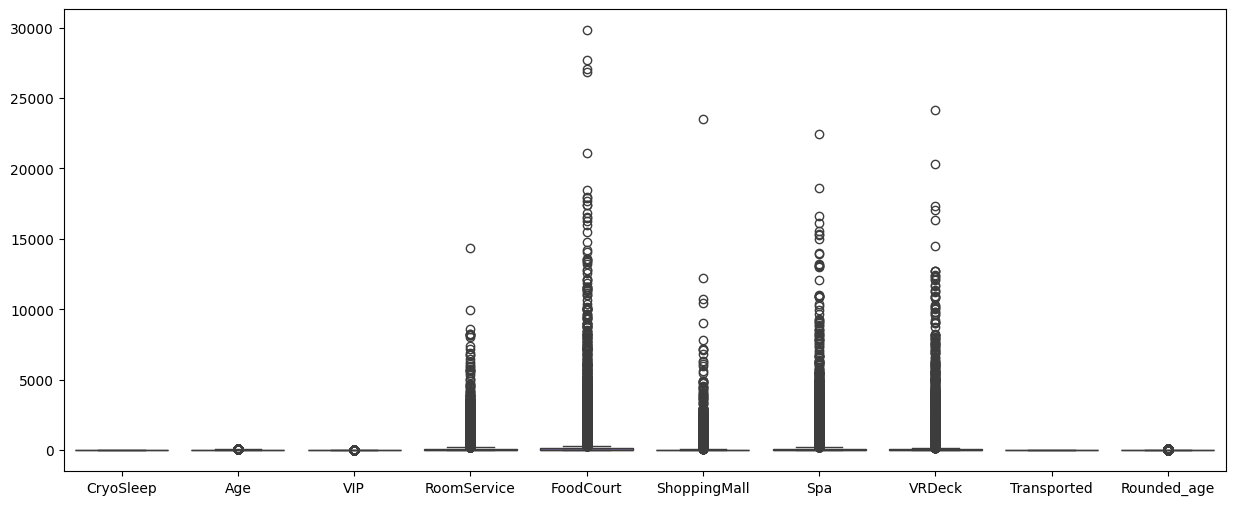

In [7]:
plt.figure(figsize=(15,6))
sns.boxplot(data)

In [8]:
for feature in num_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    data[feature] = data[feature].apply(lambda x:upper_bound if x>upper_bound else( lower_bound if x<lower_bound else x))

X = data.drop('Transported',axis=1)
y = data['Transported']

data = standard_scaling(data, num_features)

num_features = X.select_dtypes(include=['int64', 'float64']).columns
X = standard_scaling(X, num_features)
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Rounded_age
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.728328,False,-0.602569,-0.603832,-0.603971,-0.609500,-0.605096,Maham Ofracculy,0.500448
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,-0.336054,False,0.750462,-0.529840,-0.066027,1.834600,-0.003354,Juanna Vines,-0.327624
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,2.076544,True,-0.068804,1.821483,-0.603971,1.834600,0.065026,Altark Susent,1.742557
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.302575,False,-0.602569,1.821483,1.816776,1.834600,1.822385,Solam Susent,0.500448
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.903724,False,1.817991,-0.028334,1.816776,1.834600,-0.577744,Willy Santantines,-1.155696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,0.870245,True,-0.602569,1.821483,-0.603971,1.834600,0.406924,Gravior Noxnuther,1.328520
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,-0.761806,False,-0.602569,-0.603832,-0.603971,-0.609500,-0.605096,Kurta Mondalley,-1.155696
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,-0.194136,False,-0.602569,-0.603832,1.816776,-0.598516,-0.605096,Fayey Connon,-0.327624
8691,9280_01,Europa,False,E/608/S,55 Cancri e,0.231616,False,-0.602569,1.821483,-0.603971,1.834600,1.822385,Celeon Hontichre,0.500448


<Axes: >

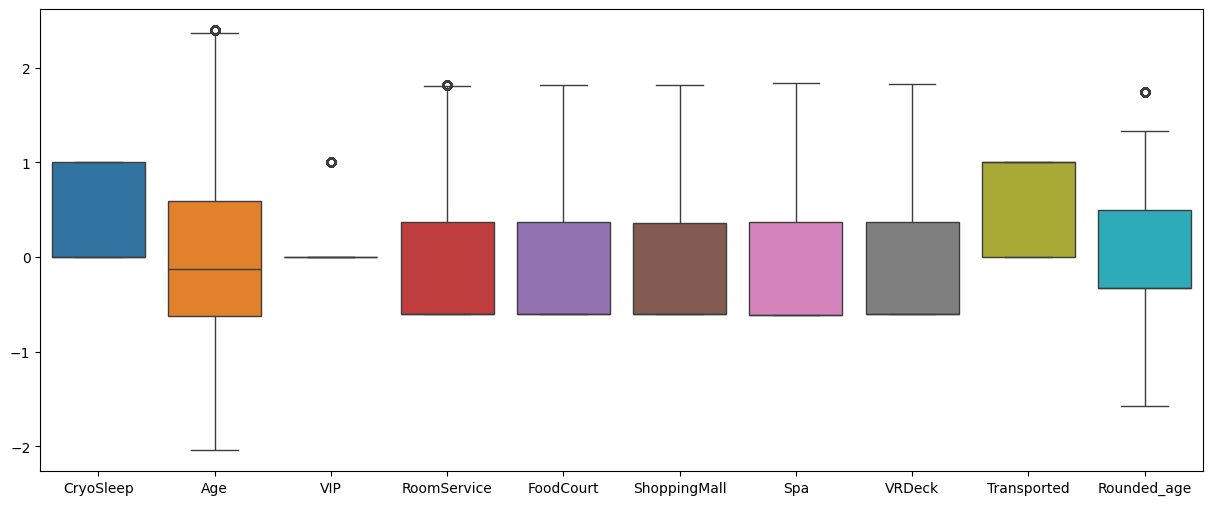

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(data)

<Axes: >

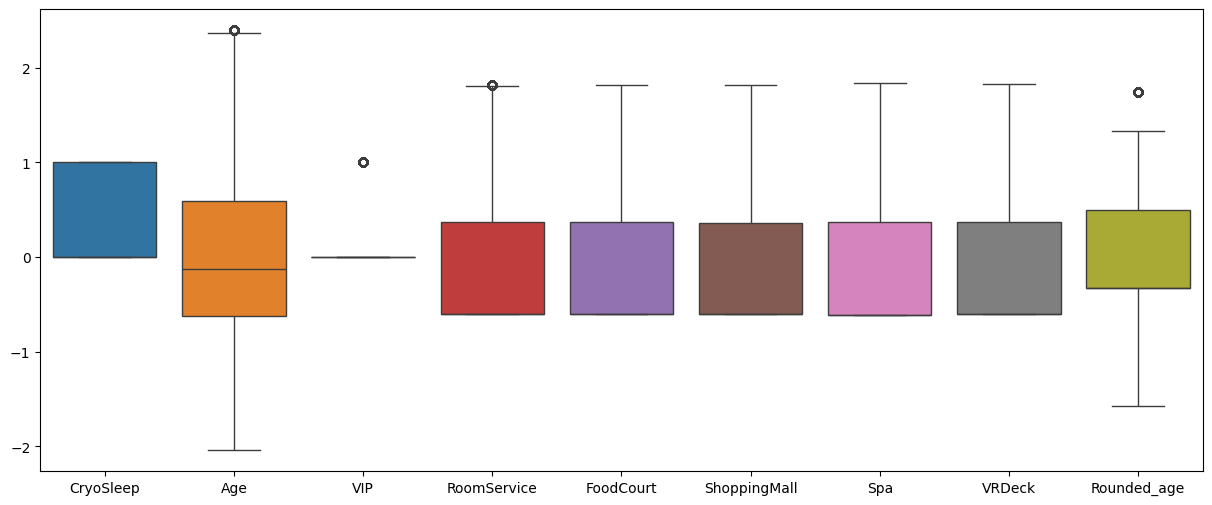

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(X)

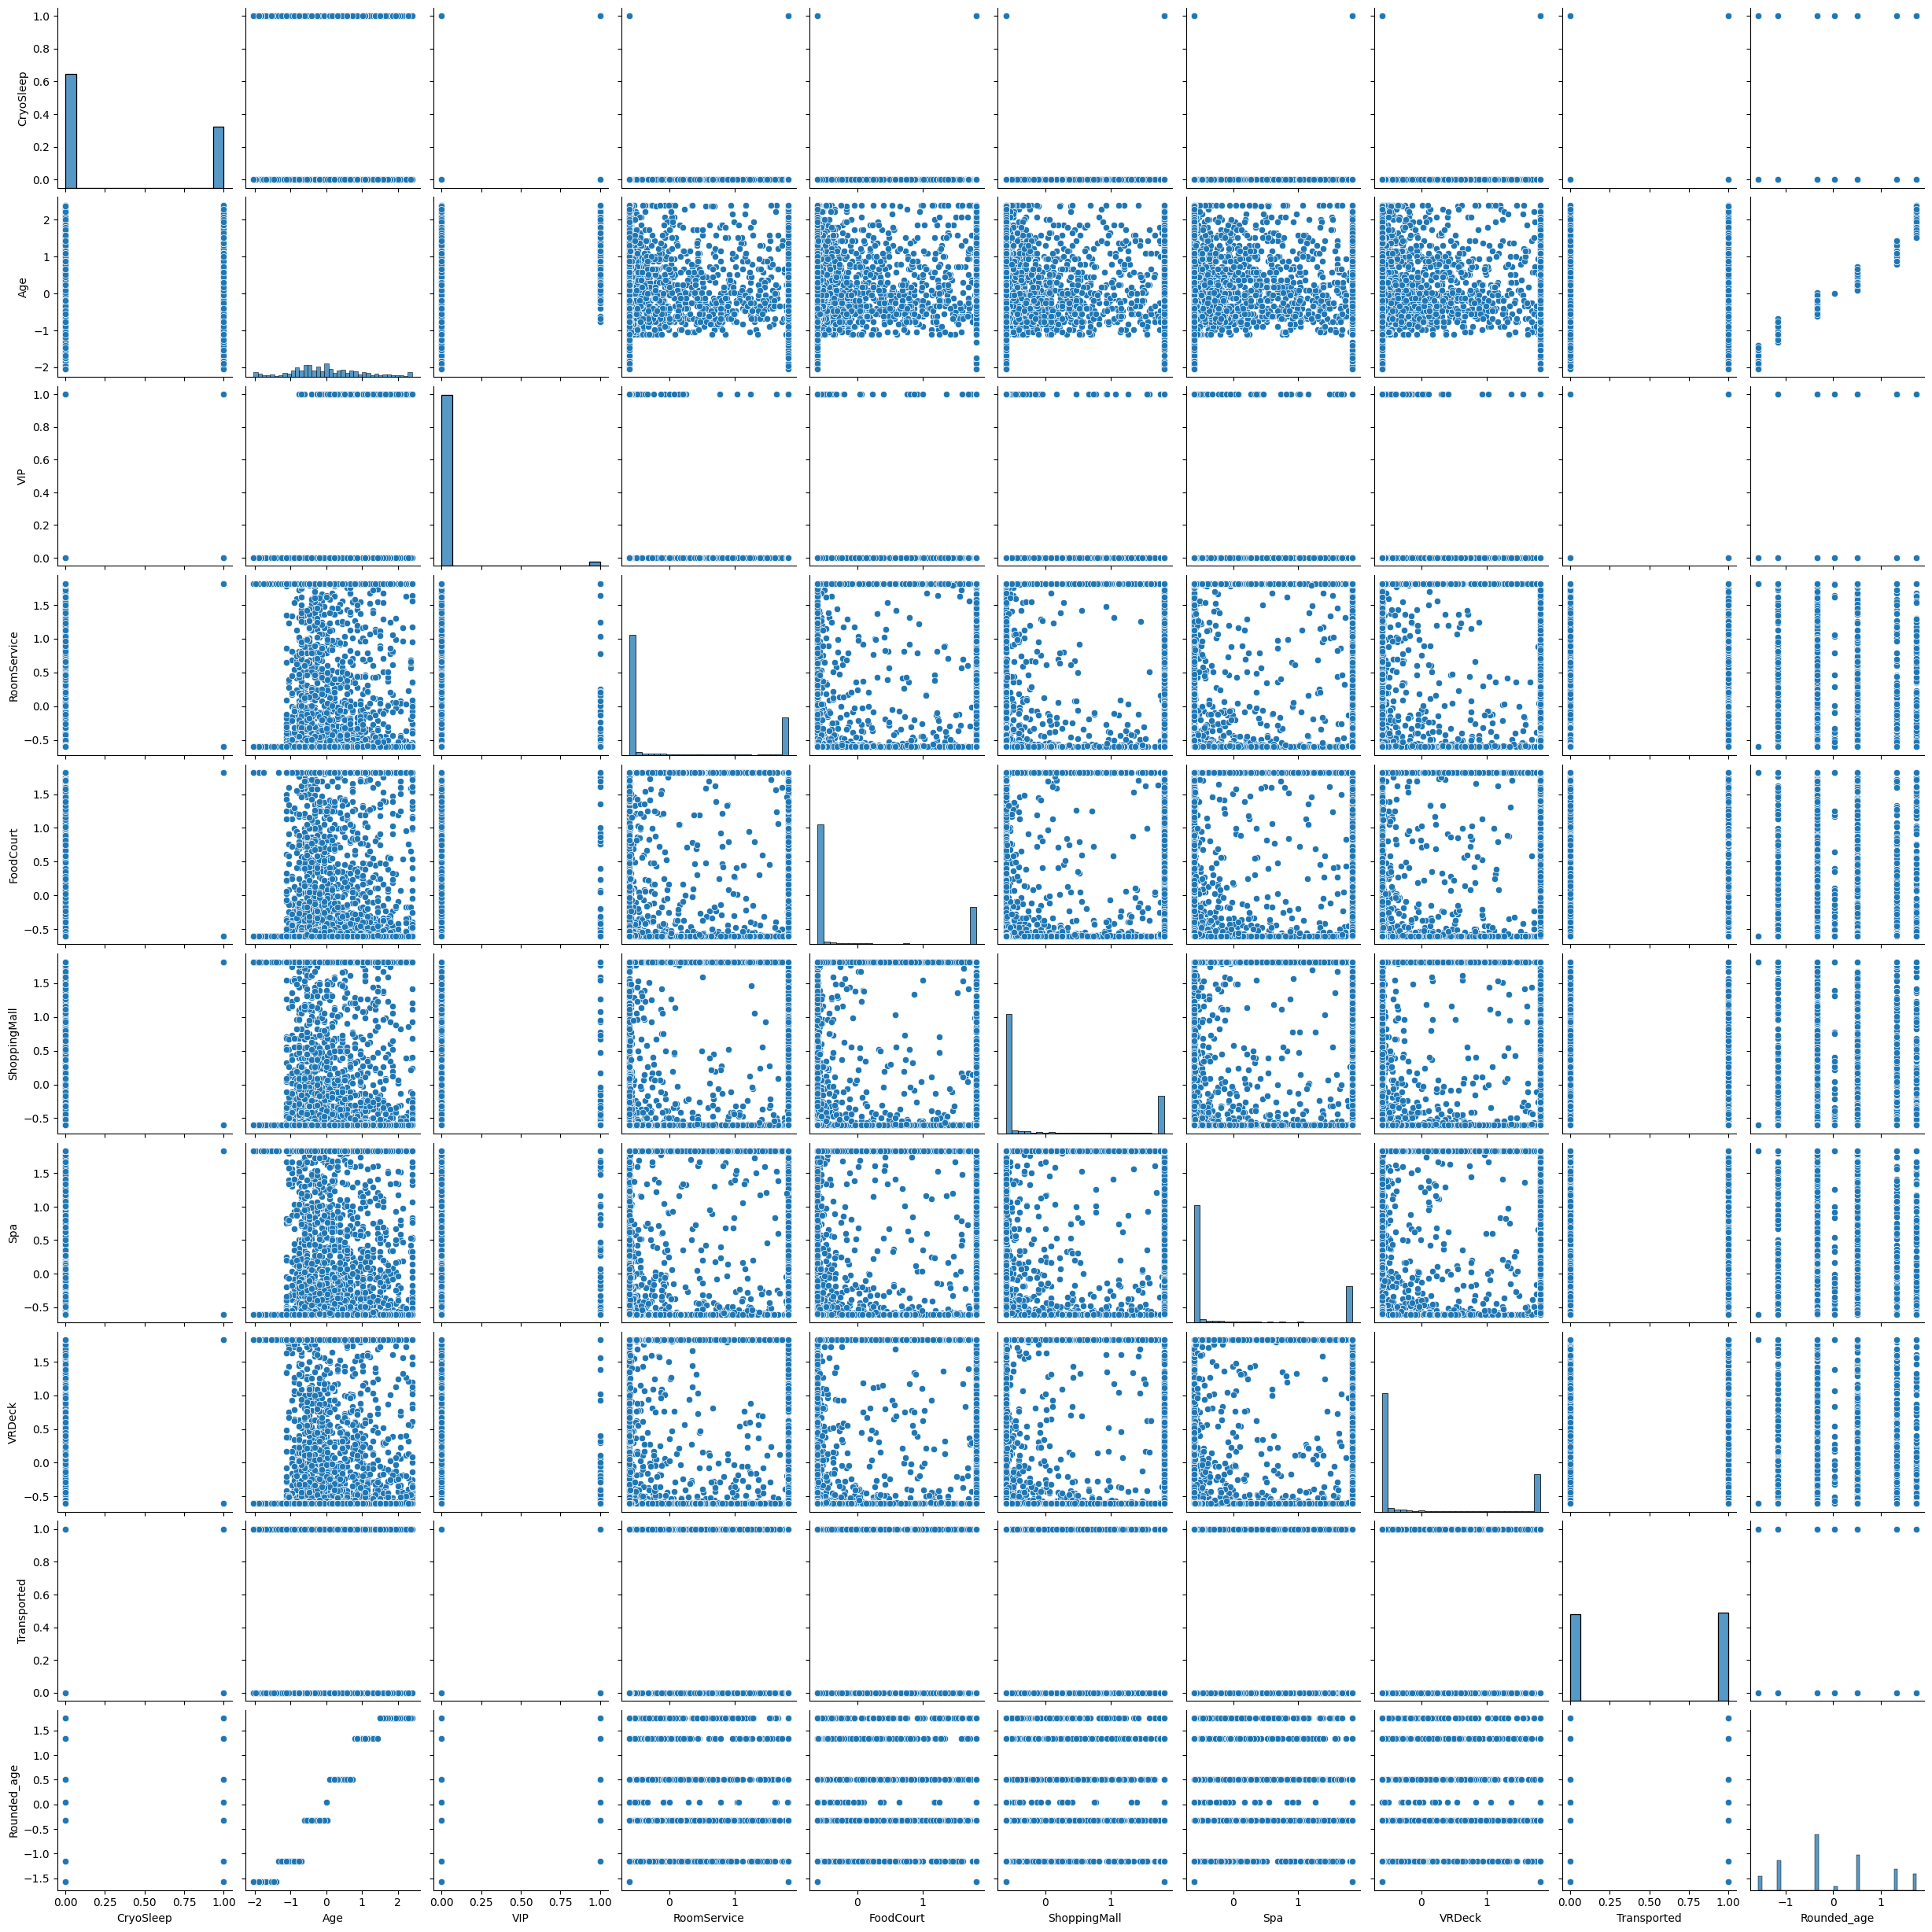

In [11]:
sns.pairplot(data)
plt.show()

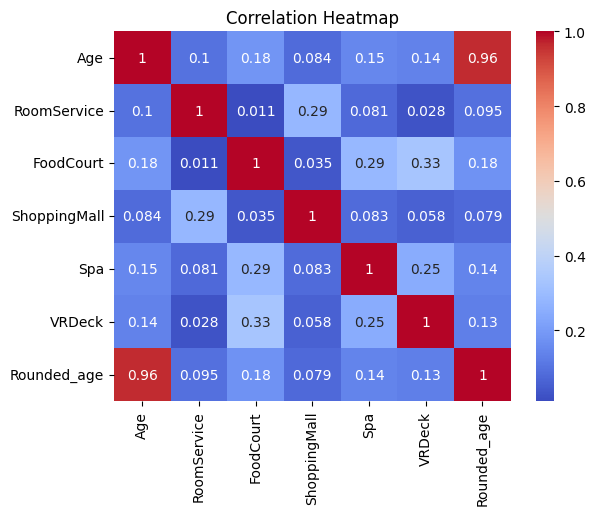

In [12]:
correlation_matrix = data[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

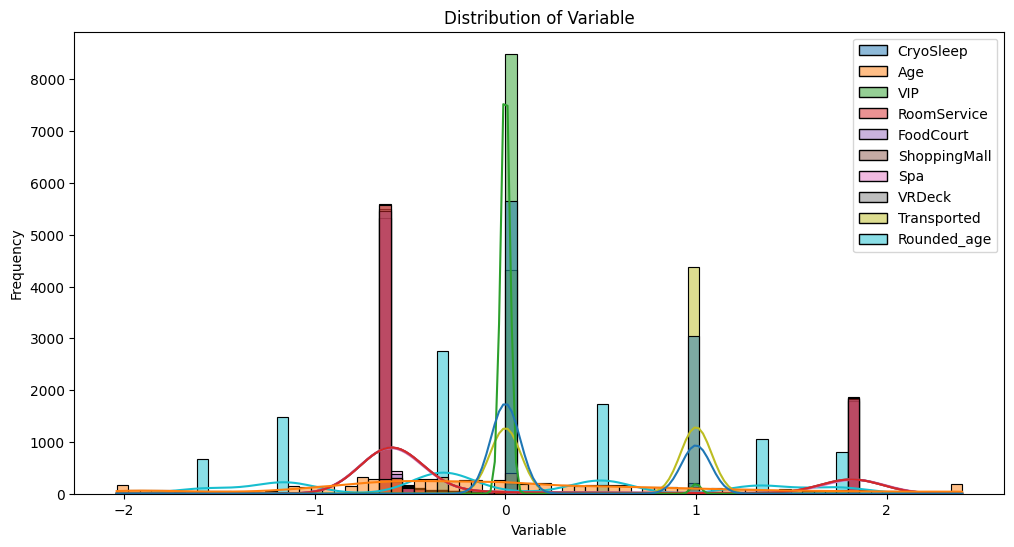

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data, kde=True)
plt.title('Distribution of Variable')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.show()

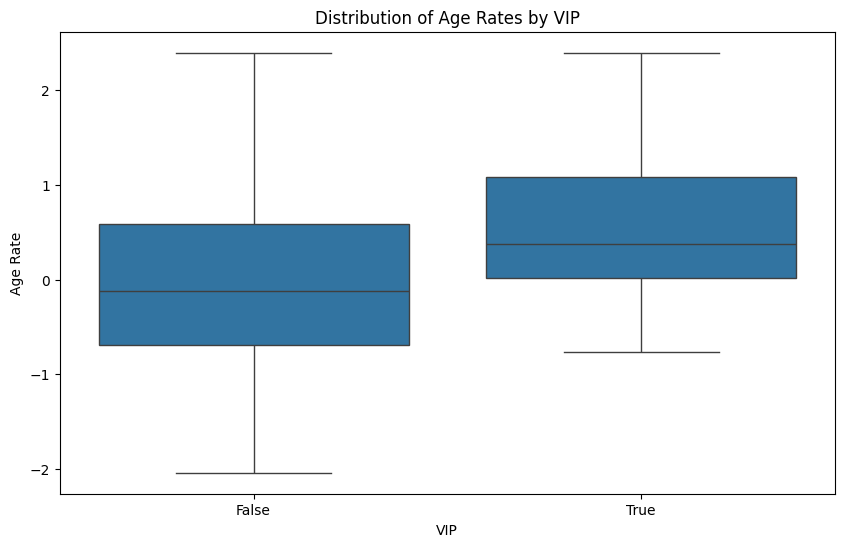

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='VIP', y='Age', data=data[['VIP','Age']])
plt.title('Distribution of Age Rates by VIP')
plt.xlabel('VIP')
plt.ylabel('Age Rate')
plt.show()

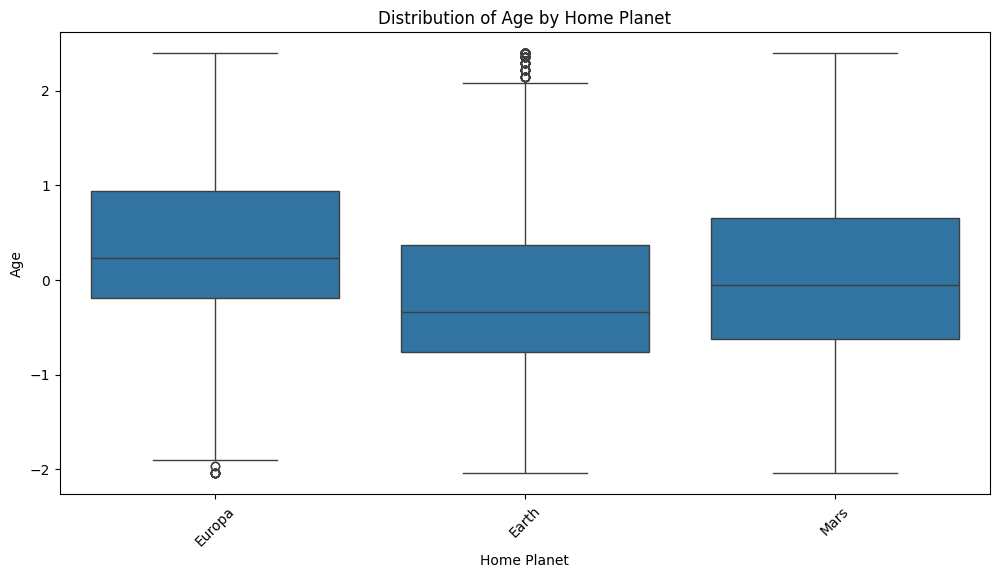

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HomePlanet', y='Age', data=data)
plt.title('Distribution of Age by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='HomePlanet'>

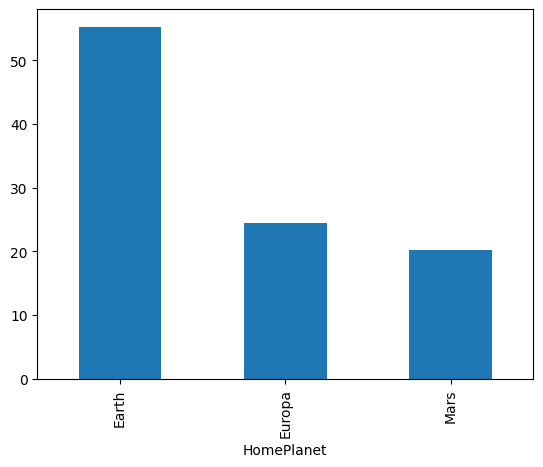

In [16]:
((data.HomePlanet.value_counts()/len(data.HomePlanet))*100).plot(kind='bar')

<Axes: xlabel='Rounded_age'>

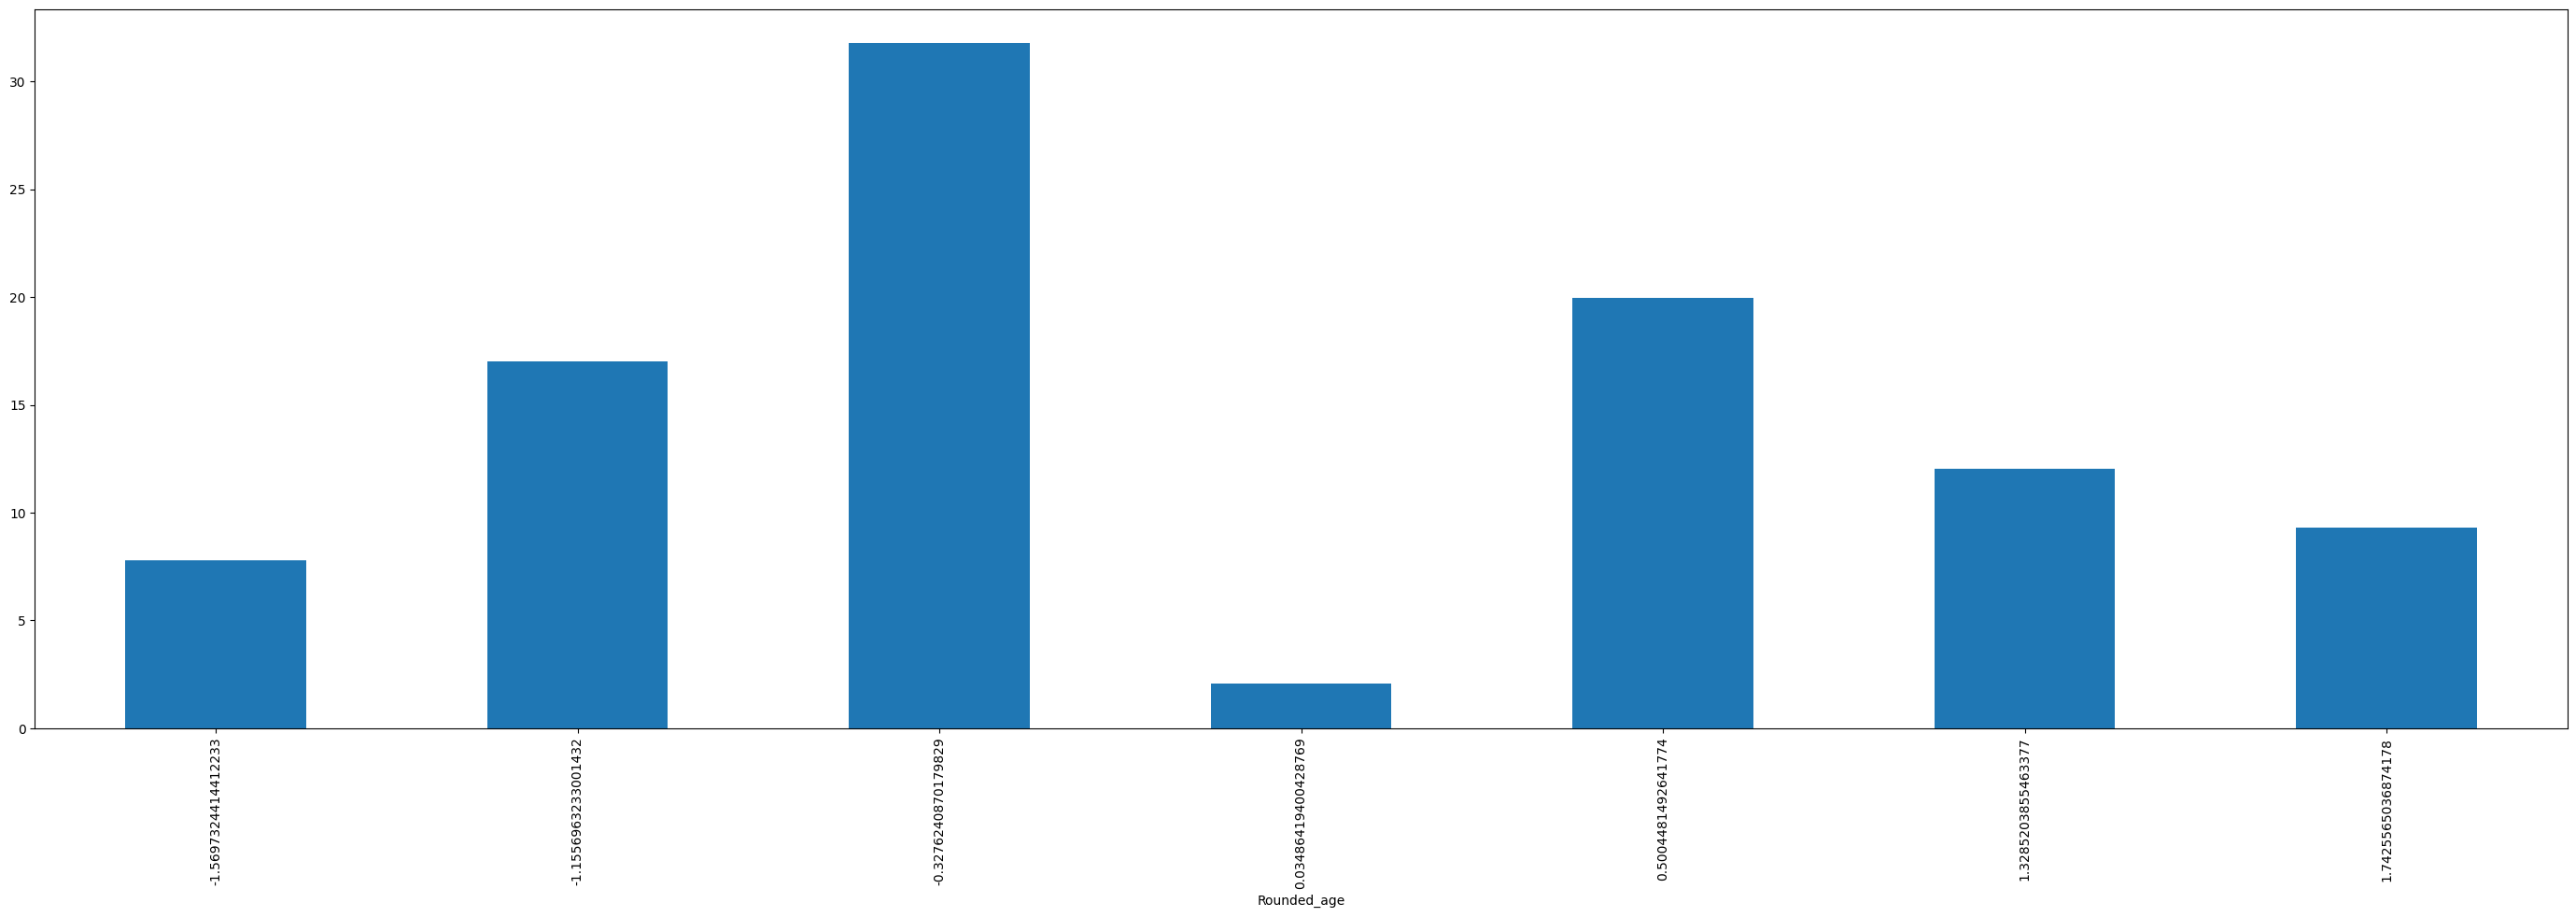

In [17]:
plt.figure(figsize=(35,10))
((data.Rounded_age.value_counts().sort_index()/len(data.Rounded_age))*100).plot(kind='bar')

In [18]:
label_encoder = LabelEncoder()

data['HomePlanet_Encoded'] = label_encoder.fit_transform(data['HomePlanet'])
data['Cabin_Encoded'] = label_encoder.fit_transform(data['Cabin'])
data['Destination_Encoded'] = label_encoder.fit_transform(data['Destination'])
data['Name_Encoded'] = label_encoder.fit_transform(data['Name'])
# data['Cryo_Encoded'] = label_encoder.fit_transform(data['CryoSleep'])
# data['VIP_Encoded'] = label_encoder.fit_transform(data['VIP'])
data = data.drop(['HomePlanet','Cabin','Destination','Name'],axis=1)

x_data = data.drop(['Transported'],axis=1)
y_data = data['Transported']

train_data, test_data =  train_test_split(data, test_size=0.2, random_state=42)

x_train = train_data.drop(['Transported'],axis=1)
y_train = train_data['Transported']


x_test = test_data.drop(['Transported'],axis=1)
y_test = test_data['Transported']


# print(x_data.shape)
# print(y_data.shape)

In [19]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

cv_scores = []

for train_idx, test_idx in kfold.split(x_data, y_data):
    
    model = LogisticRegression(max_iter=100000)
    model.fit(x_data.iloc[train_idx], y_data.iloc[train_idx])
    y_pred = model.predict(x_data.iloc[test_idx])
    accuracy = accuracy_score(y_data.iloc[test_idx], y_pred)
    
    print("Accuracy: %.3f" % accuracy)
    cv_scores.append(accuracy)

print("Average Accuracy: %.3f" % np.mean(cv_scores))


Accuracy: 0.767
Accuracy: 0.773
Accuracy: 0.768
Accuracy: 0.760
Accuracy: 0.755
Average Accuracy: 0.765
